In [2]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import glob

In [3]:
#setting path to the env variable
folder = os.environ['CAPSTONE_DATA']
folder

'C:\\max\\Google Drive Max\\Max Shared\\Master Data Science\\2020-05 Capstone A\\msds_capstone\\data\\'

# EDA

## Loading

In [4]:
dataRaw= pd.read_pickle(os.path.join(folder,'tidy_data/Transactions_v2/Transactions.pkl'))
print(dataRaw.shape)
dataRaw.head(1)

(233152, 50)


,Month,Chain Master ID,Chain Master,Customer ID,Customer,Beverage Type,Vendor,Vendor ID,Brand,Label,...,Alcohol Proof,Metrics,STD. Cases,Dollar Sales,9L Cases,Dollar Sales per Case,Dollar Sales per 9L Case,Size Liters,Bottles,Transactions
0,2015-03-01,1000325,SPECS,300001740,COWTOWN DISC LIQUOR SPF LTD,SPIRITS,SAZERAC/GEMINI SPIRITS & WINE,854,FIREBALL,FIREBALL CINN WHSKY,...,66.0,NaN,222.0,38734.56,295.26,174.48,131.18797,0.1,2664.0,1


### Filter by Category in Sup Premium Whiskey, Premium Vodka

In [5]:
data=dataRaw[dataRaw['Category (CatMan)'].isin(['SUP PREM WHISKEY','ECONOMY VODKA'])]
print(data.shape)
plt.style.use('default')
             

(25722, 50)


In [6]:
dataT = data.groupby(['Chain Master','Category (CatMan)','Product'])['Month'].nunique().sort_values(ascending=False)
t=dataT.groupby(level=[0,1],group_keys=False)
t2=t.apply(lambda x: x.sort_values(ascending=False).head(10)).reset_index()
t2['Product'].unique()

# all chains in elpase, for category ['SUP PREM WHISKEY','ECONOMY VODKA'], all products, by week.



array(['TAAKA VODKA 80  1L', 'TAAKA VODKA 80 PET 1.75L',
       'TAAKA VODKA 80 BLUE PET 375M', 'TAAKA VODKA 80 PET 750M',
       'DOBRA VODKA  1.75L', 'MCCORMICK CHERRY VODKA 60  1L',
       'MCCORMICK APPLE VODKA 60  1L', 'TAAKA VODKA 80 BLUE PET 200M',
       'MCCORMICK GRAPE VODKA 60  1L', 'MCCORMICK APPLE VODKA 60  1.75L',
       'GENTLEMAN JACK WHSKY 6PK 1L', 'JACK DANIELS BLK WHSKY  1L',
       'JACK DANIELS TENN HNY WHSKY  1L',
       'JACK DANIELS TENN HNY WHSKY  750M',
       'JACK DANIELS BLK WHSKY  750M', 'JACK DANIELS GRN  750M',
       'JACK DANIELS BLK WHSKY LSE 50M',
       'JACK DANIELS TENN HNY WHSKY  1.75L',
       'JACK DANIELS BLK WHSKY  1.75L', 'GENTLEMAN JACK WHSKY OL 1.75L',
       'MCCORMICK CITRUS VODKA 60  1L', 'MCCORMICK PEACH VODKA 60  1L',
       'MCCORMICK WATERMELON VODKA 60  1L',
       'MCCORMICK RASPBERRY VODKA 60  1L', 'GENTLEMAN JACK WHSKY OL 750M',
       'BUFFALO TRACE BBN BRL  750M',
       'JACK DANIELS BLK WHSKY FLSK PET 375M',
       'GENTLEMA

# Qualitative Distribution

## Record count

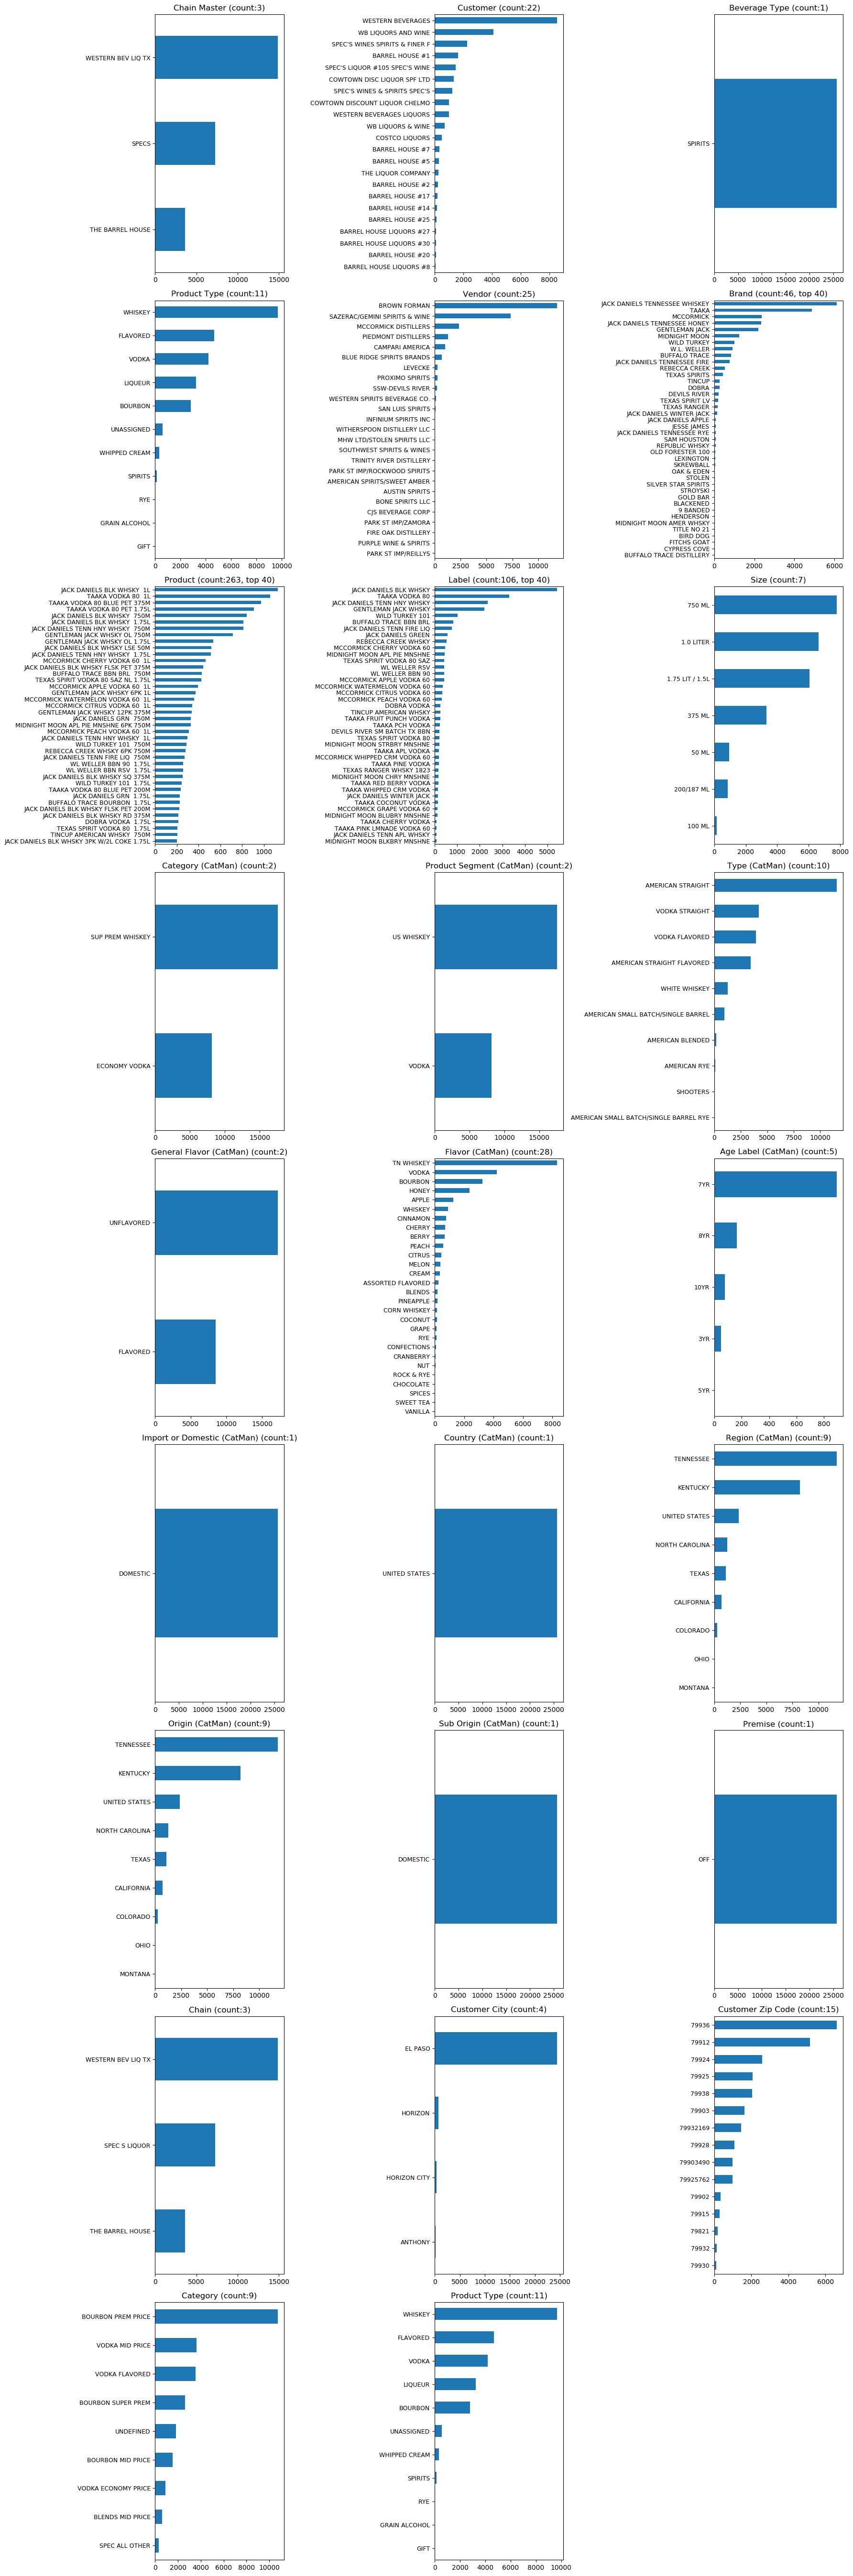

In [7]:
#cols = data.select_dtypes('object').columns
cols = ['Chain Master','Customer','Beverage Type','Product Type','Vendor','Brand','Product','Label','Size','Category (CatMan)'
        ,'Product Segment (CatMan)','Type (CatMan)','General Flavor (CatMan)','Flavor (CatMan)','Age Label (CatMan)'
        ,'Import or Domestic (CatMan)','Country (CatMan)','Region (CatMan)','Origin (CatMan)','Sub Origin (CatMan)'
        ,'Premise','Chain','Customer City','Customer Zip Code'
        ,'Category','Product Type'

]

rows = math.ceil(len(cols)/3)
plt.figure(figsize=(18,6*rows))
maxOut = 40
for i,c in enumerate(cols):
    plt.subplot(rows,3,i+1)
    v =  data[c].value_counts().sort_values(ascending=True)
    plt.title(c + ' (count:' + str(v.shape[0]) + (', top ' + str(maxOut)  if v.shape[0]>maxOut else '' ) + ')')
    plt.tick_params(axis='y',labelsize=9)
    v.tail(maxOut).plot(kind='barh')
plt.tight_layout()

## Sales 9L Cases

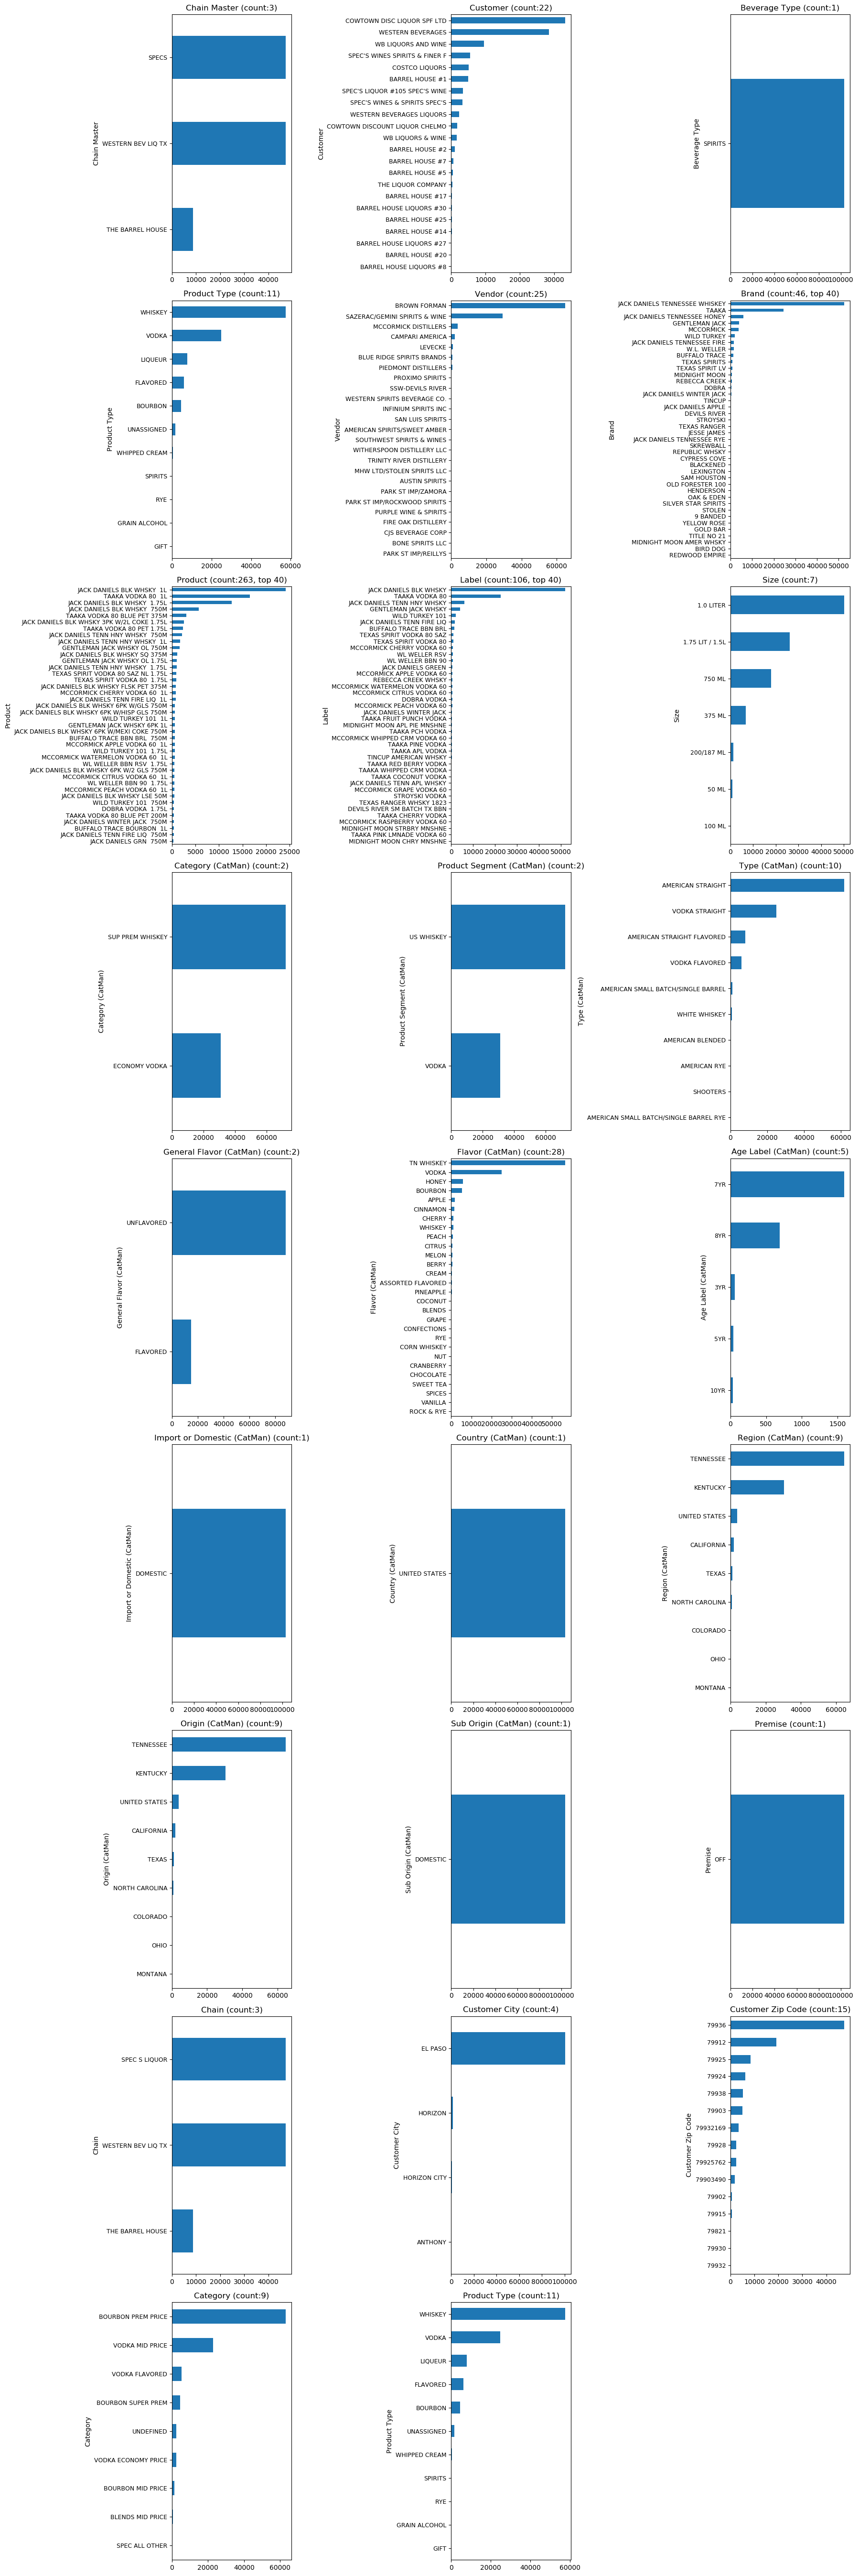

In [8]:
rows=math.ceil(len(cols)/3)
plt.figure(figsize=(18,6*rows))
maxOut = 40
for i,c in enumerate(cols):
    plt.subplot(rows,3,i+1)
    v =  data.groupby(c)['9L Cases'].sum().sort_values(ascending=True)
    plt.title(c + ' (count:' + str(v.shape[0]) + (', top ' + str(maxOut)  if v.shape[0]>maxOut else '' ) + ')')
    plt.tick_params(axis='y',labelsize=9)
    v.tail(maxOut).plot(kind='barh')
plt.tight_layout()

# Qualitative Distributions

## by Qualitative Column

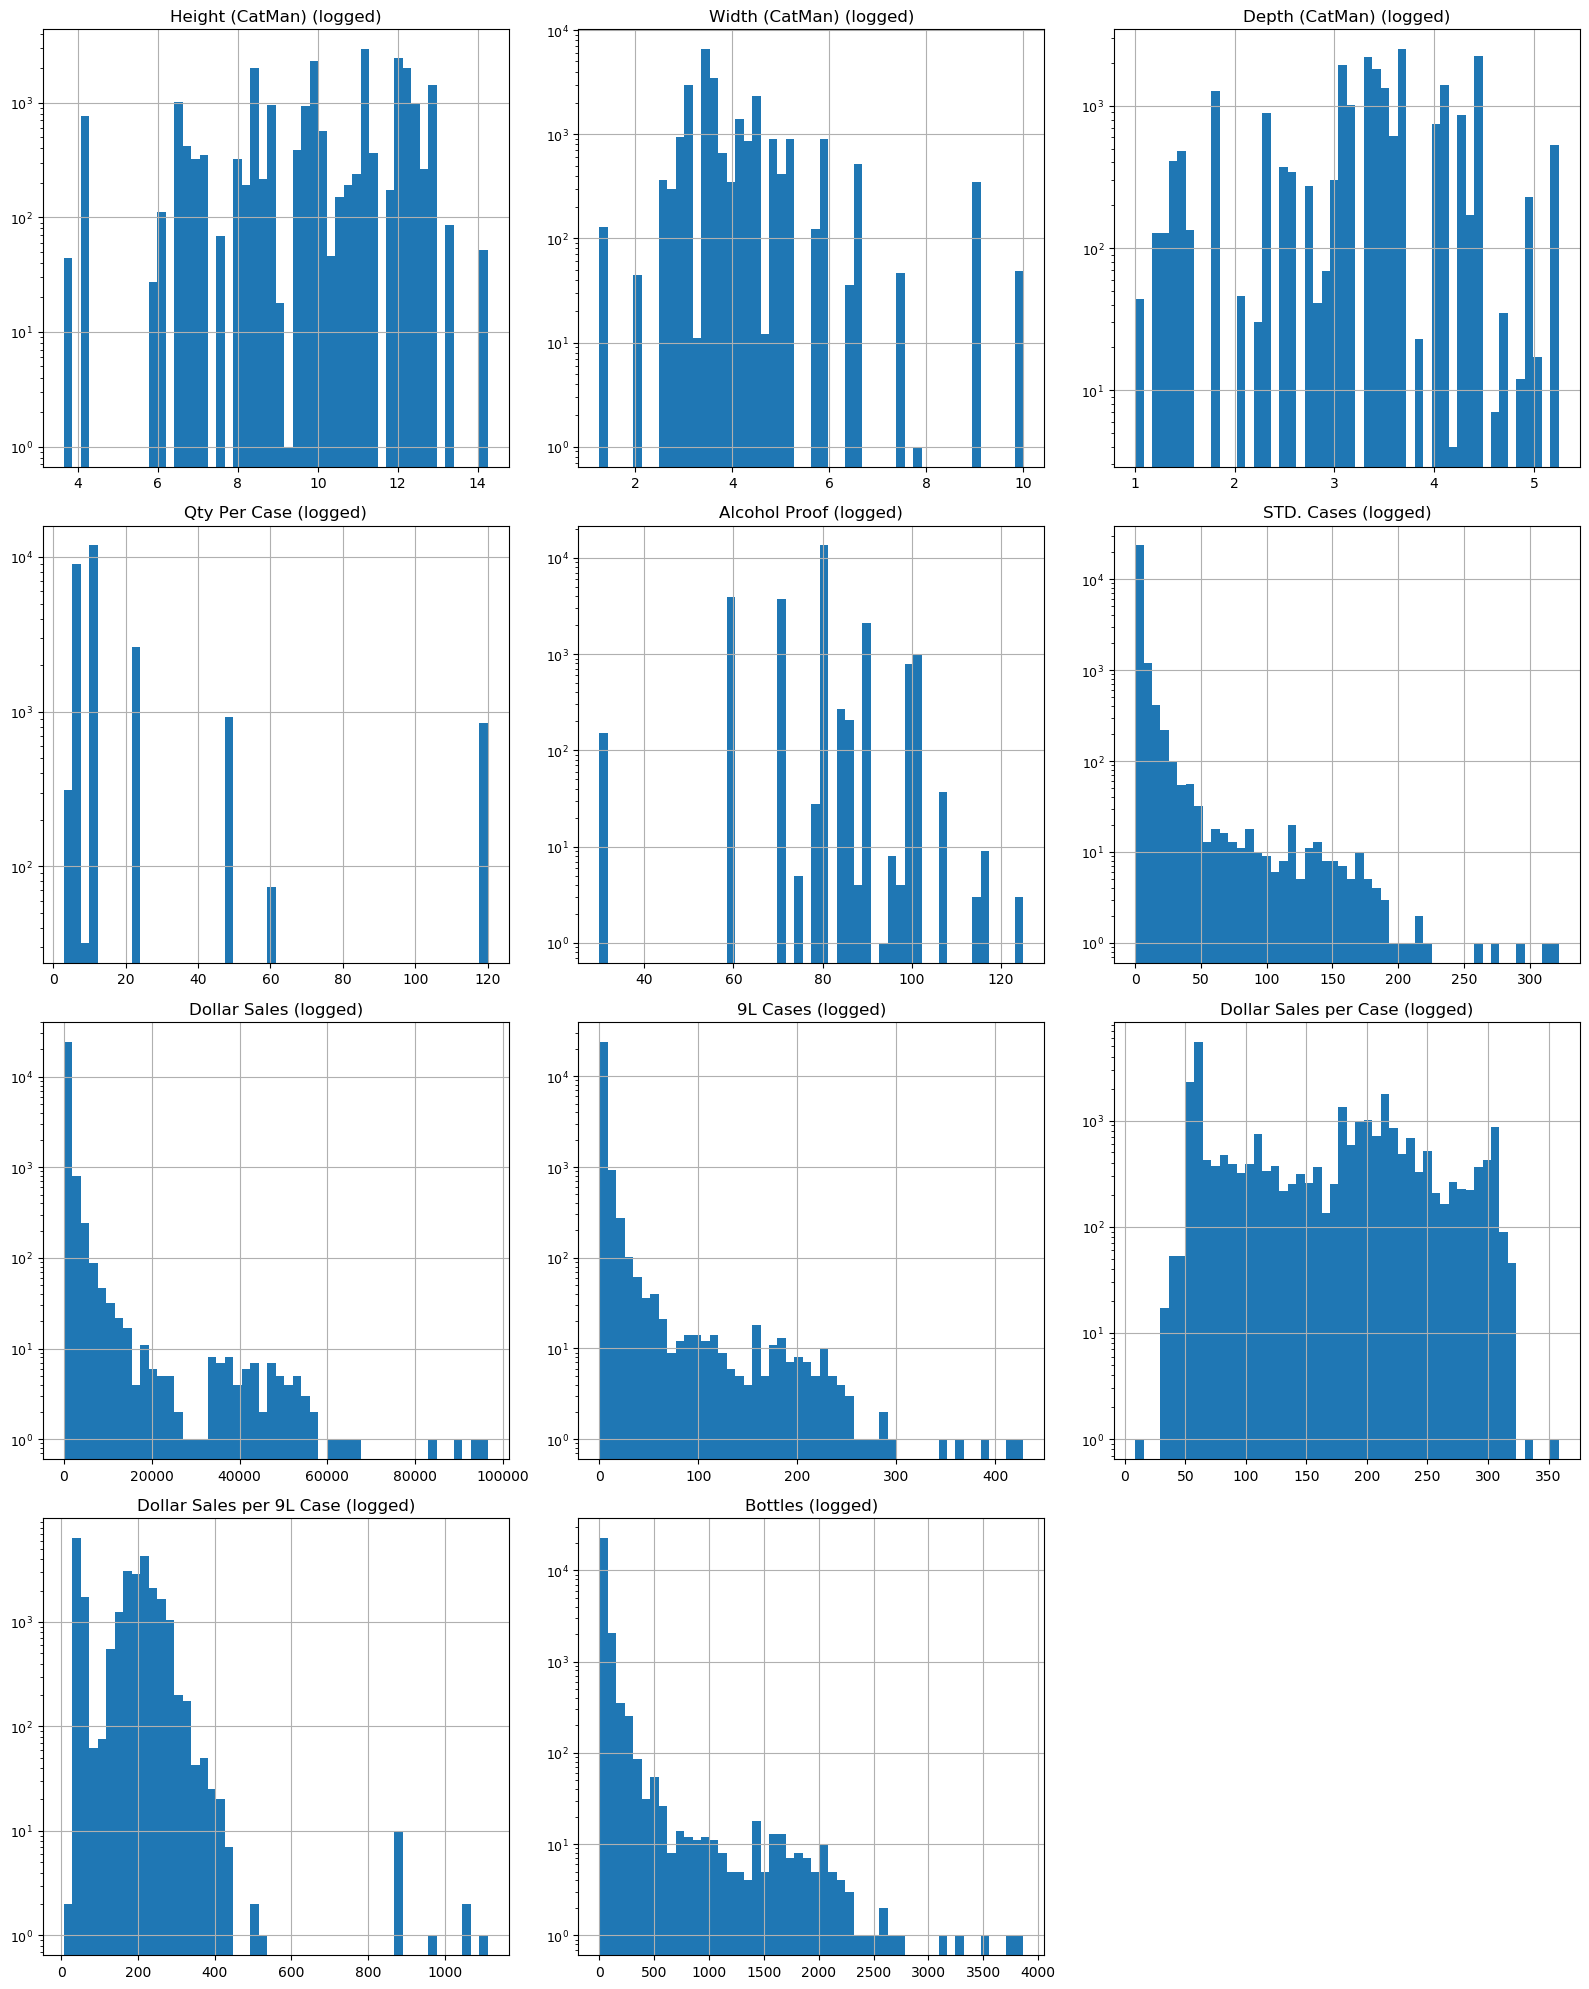

In [9]:
#cols = data.select_dtypes('object').columns
import seaborn as sns
cols = ['Height (CatMan)','Width (CatMan)','Depth (CatMan)'
        ,'Qty Per Case','Alcohol Proof'
        ,'STD. Cases','Dollar Sales','9L Cases','Dollar Sales per Case','Dollar Sales per 9L Case'
        ,'Bottles']
rows = math.ceil(len(cols)/3)
plt.figure(figsize=(16,5*rows))
for i,c in enumerate(cols):
    plt.subplot(rows,3,i+1)
    plt.title(c + ' (logged)')
    plt.tick_params(axis='y',labelsize=9)
    data[data[c]!=-99999][c].hist(bins=50)
    #sns.distplot(data[c],bins=50,kde=False)
    plt.yscale(value='log')
    
plt.tight_layout()

## Trends by Month

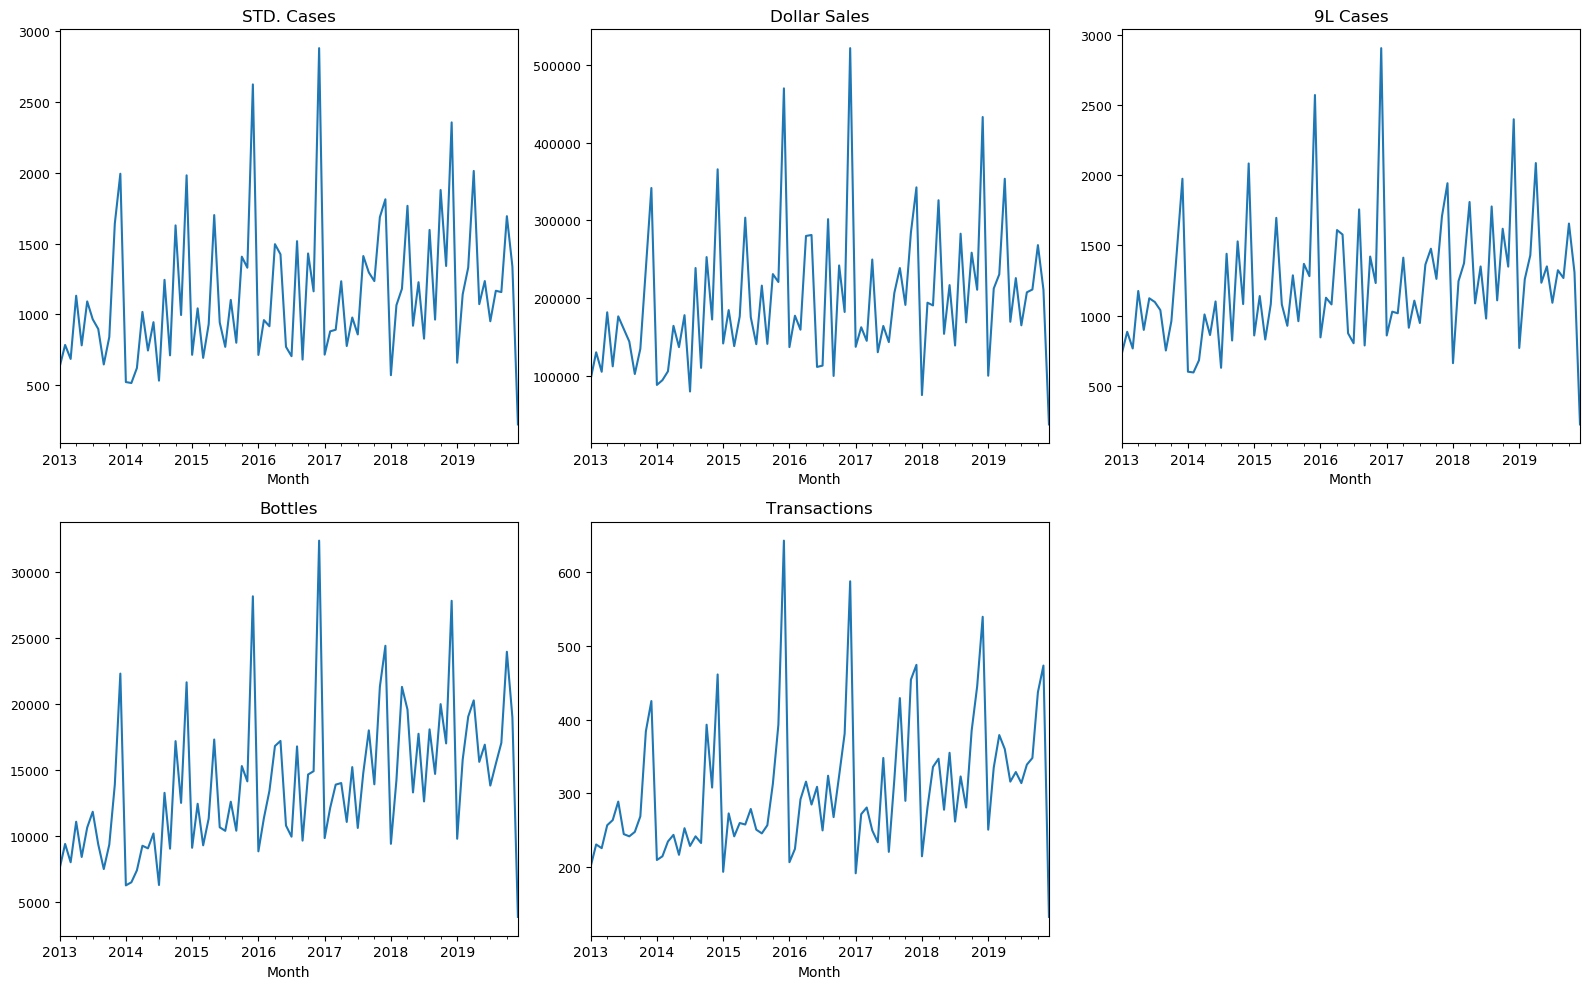

In [10]:
#cols = data.select_dtypes('object').columns
import seaborn as sns
cols = ['STD. Cases','Dollar Sales','9L Cases','Bottles','Transactions']
rows = math.ceil(len(cols)/3)
plt.figure(figsize=(16,5*rows))
for i,c in enumerate(cols):
    plt.subplot(rows,3,i+1)
    plt.title(c)
    plt.tick_params(axis='y',labelsize=9)
    d=data.groupby(by='Month')[c].sum()
    d.plot()
plt.tight_layout()

# Price Analysis

## Distribution of Price Mean and Std per Product

<Figure size 1600x500 with 0 Axes>

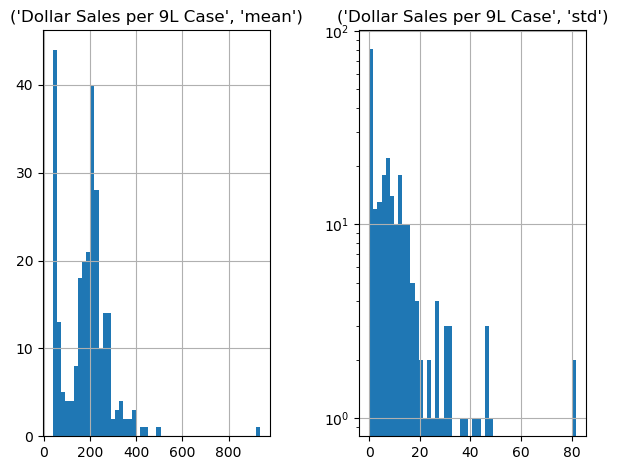

In [11]:

products = data.groupby('Product').agg({'Dollar Sales per 9L Case':[np.mean,np.std]})
plt.figure(figsize=(16,5))
products.hist(bins=50)
plt.yscale(value='log')
plt.tight_layout()           
           

## Price Mean and Variance by Month (Normalized)

## Top Customers

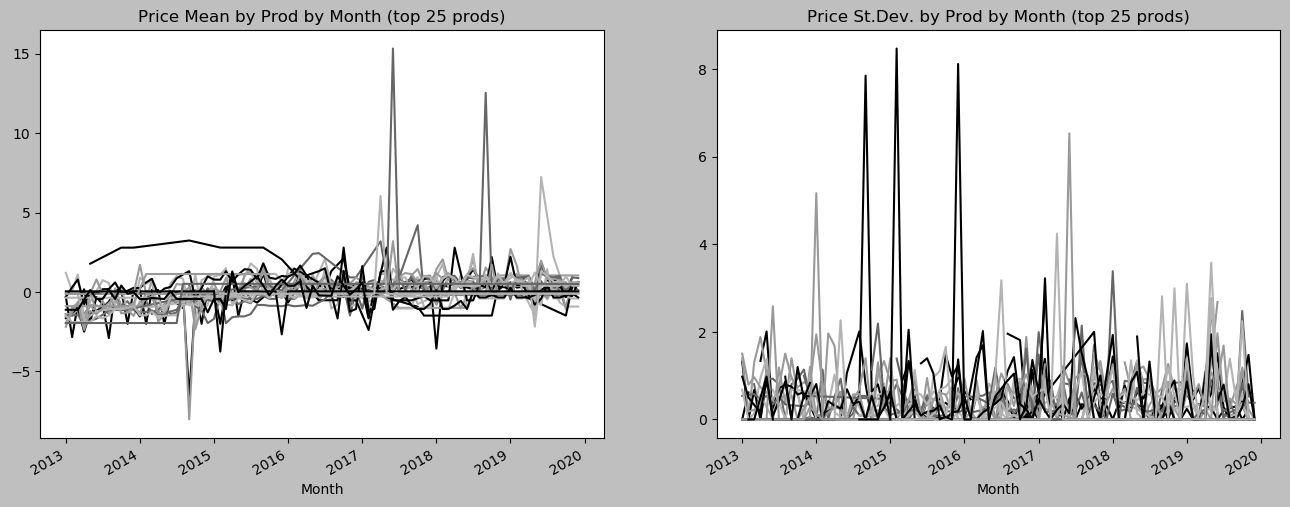

,Product,Month,Price9LMean,Price9LStd,ProductID
1351,TAAKA VODKA 80 BLUE PET 375M,2015-02-01,-3.747929,8.468516,854495
1361,TAAKA VODKA 80 BLUE PET 375M,2015-12-01,-2.665862,8.115505,854495
347,JACK DANIELS BLK WHSKY 1.75L,2014-09-01,-6.593993,7.848156,5412
1213,MCCORMICK CHERRY VODKA 60 1L,2017-06-01,3.196840,6.530637,82970
1172,MCCORMICK CHERRY VODKA 60 1L,2014-01-01,1.706466,5.164920,82970
...,...,...,...,...,...
1591,WILD TURKEY 101 1L,2014-02-01,-0.442256,NaN,12613
1593,WILD TURKEY 101 1L,2014-05-01,-0.442256,NaN,12613
1595,WILD TURKEY 101 1L,2014-07-01,-0.442256,NaN,12613
1602,WILD TURKEY 101 1L,2015-02-01,-0.442256,NaN,12613


In [12]:
# center and scale price per each product
dataT = data[data['Dollar Sales per 9L Case'] > 0].copy()
dataT['Dollar Sales per 9L Case Norm'] = dataT.groupby(['Product'])['Dollar Sales per 9L Case'].transform(lambda x:(x - x.mean()) / x.std())

topNum=25
topProds = (dataT.groupby('Product')
            .agg(Tot9LCases= ('9L Cases',sum))
            .sort_values(by='Tot9LCases',ascending=False)
            .head(topNum)
           )

productsMonth=(dataT[dataT['Product'].isin(topProds.index.values)]
               .groupby(['Product','Month'])
               .agg(Price9LMean=('Dollar Sales per 9L Case Norm',np.mean)
                    ,Price9LStd=('Dollar Sales per 9L Case Norm',np.std)
                    ,ProductID = ('Product ID','first')
                   )
               .reset_index()
              )

plt.style.use('grayscale')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
productsMonth.groupby('Product').plot.line(x='Month',y='Price9LMean',ax=ax1)
ax1.get_legend().remove()
ax1.set_title("Price Mean by Prod by Month (top " + str(topNum) + ' prods)')

productsMonth.groupby('Product').plot.line(x='Month',y='Price9LStd',ax=ax2)
ax2.get_legend().remove()
ax2.set_title("Price St.Dev. by Prod by Month (top " + str(topNum) + ' prods)')
plt.show()
plt.style.use('default')
#print(productsMonth.shape)
productsMonth.sort_values(by='Price9LStd',ascending=False)

## Bottom Customers

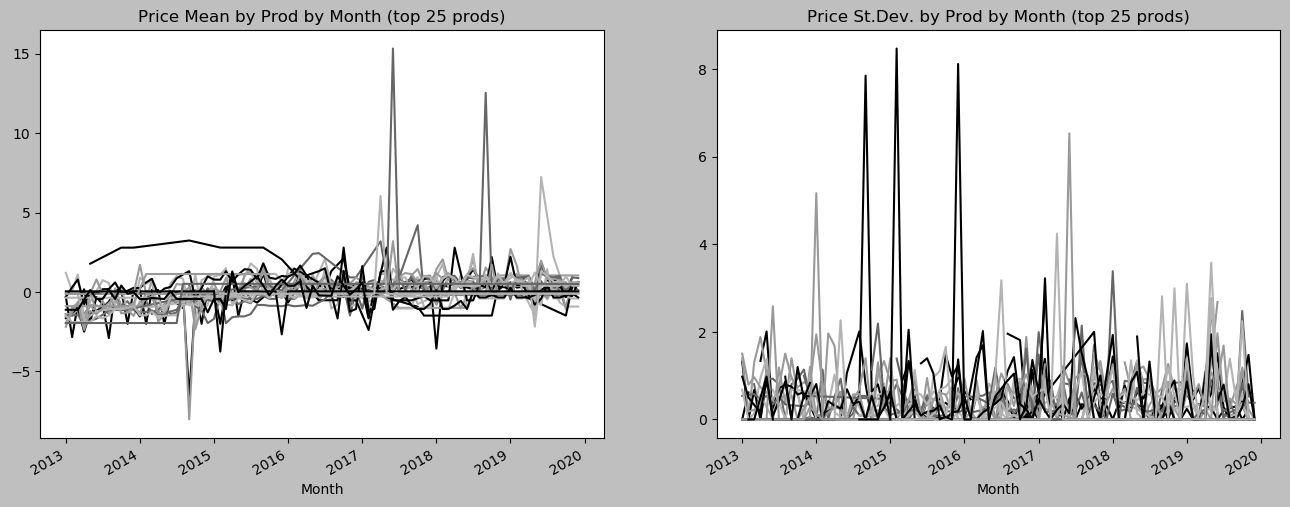

,Product,Month,Price9LMean,Price9LStd,ProductID
1351,TAAKA VODKA 80 BLUE PET 375M,2015-02-01,-3.747929,8.468516,854495
1361,TAAKA VODKA 80 BLUE PET 375M,2015-12-01,-2.665862,8.115505,854495
347,JACK DANIELS BLK WHSKY 1.75L,2014-09-01,-6.593993,7.848156,5412
1213,MCCORMICK CHERRY VODKA 60 1L,2017-06-01,3.196840,6.530637,82970
1172,MCCORMICK CHERRY VODKA 60 1L,2014-01-01,1.706466,5.164920,82970
...,...,...,...,...,...
1591,WILD TURKEY 101 1L,2014-02-01,-0.442256,NaN,12613
1593,WILD TURKEY 101 1L,2014-05-01,-0.442256,NaN,12613
1595,WILD TURKEY 101 1L,2014-07-01,-0.442256,NaN,12613
1602,WILD TURKEY 101 1L,2015-02-01,-0.442256,NaN,12613


In [13]:
# center and scale price per each product
dataT = data[data['Dollar Sales per 9L Case'] > 0].copy()
dataT['Dollar Sales per 9L Case Norm'] = dataT.groupby(['Product'])['Dollar Sales per 9L Case'].transform(lambda x:(x - x.mean()) / x.std())

bottomNum=25
bottomProds = (dataT.groupby('Product')
            .agg(Tot9LCases= ('9L Cases',sum))
            .sort_values(by='Tot9LCases',ascending=False)
            .head(topNum)
           ) 

productsMonth=(dataT[dataT['Product'].isin(bottomProds.index.values)]
               .groupby(['Product','Month'])
               .agg(Price9LMean=('Dollar Sales per 9L Case Norm',np.mean)
                    ,Price9LStd=('Dollar Sales per 9L Case Norm',np.std)
                    ,ProductID = ('Product ID','first')
                   )
               .reset_index()
              )

plt.style.use('grayscale')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
productsMonth.groupby('Product').plot.line(x='Month',y='Price9LMean',ax=ax1)
ax1.get_legend().remove()
ax1.set_title("Price Mean by Prod by Month (top " + str(topNum) + ' prods)')

productsMonth.groupby('Product').plot.line(x='Month',y='Price9LStd',ax=ax2)
ax2.get_legend().remove()
ax2.set_title("Price St.Dev. by Prod by Month (top " + str(topNum) + ' prods)')
plt.show()
#print(productsMonth.shape)
productsMonth.sort_values(by='Price9LStd',ascending=False)

## Price Mean and Variance by Month, Product and Customer (Normalized)

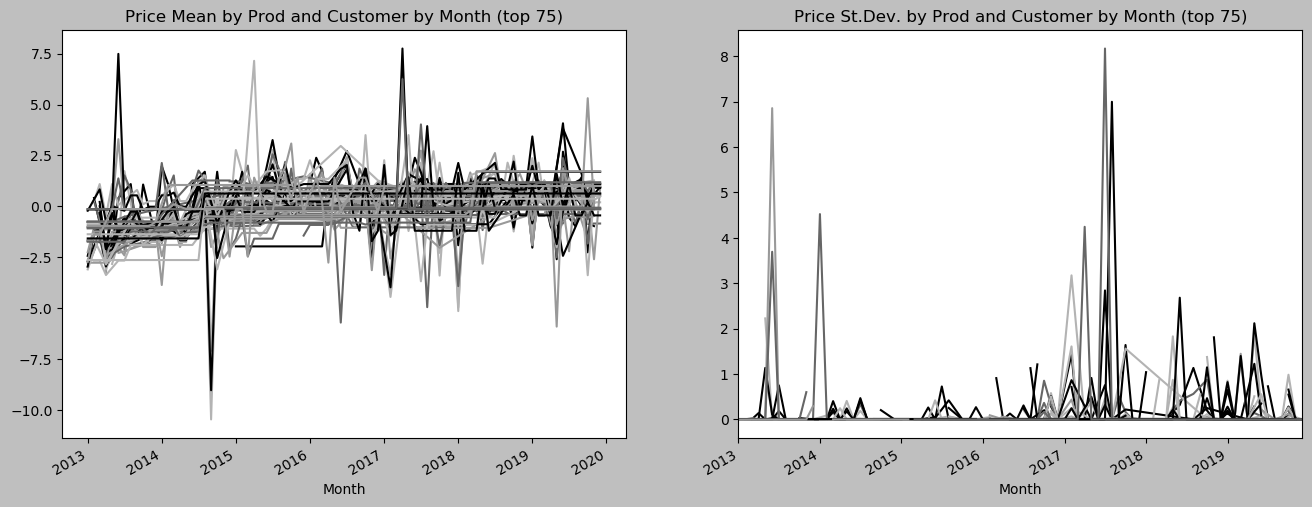

,ProductCustomer,Month,Price9LMean,Price9LStd,ProductID,CustomerID
3688,TEXAS SPIRIT VODKA 80 SAZ NL 1.75L-WB LIQUORS ...,2017-04-01,7.746491,0.00000,856724,300001416
2740,MCCORMICK PEACH VODKA 60 1L-WESTERN BEVERAGES,2013-06-01,7.483243,0.00000,82973,300001413
3209,TAAKA VODKA 80 BLUE PET 375M-BARREL HOUSE #1,2015-04-01,7.142731,NaN,854495,300004001
3634,TEXAS SPIRIT VODKA 80 SAZ NL 1.75L-COSTCO LIQUORS,2017-04-01,6.929646,NaN,856724,300001096
3745,TEXAS SPIRIT VODKA 80 SAZ NL 1.75L-WESTERN BEV...,2017-04-01,6.245420,4.24292,856724,300001417
...,...,...,...,...,...,...
1089,JACK DANIELS BLK WHSKY 1L-SPEC'S WINES & SPIR...,2016-06-01,-5.696424,NaN,5413,300008556
2447,JACK DANIELS TENN HNY WHSKY 1L-WESTERN BEVERAGES,2019-05-01,-5.893677,NaN,5704,300001417
1710,JACK DANIELS BLK WHSKY 750M-WB LIQUORS AND WINE,2014-09-01,-7.083012,NaN,5414,300001811
1774,JACK DANIELS BLK WHSKY 750M-WESTERN BEVERAGES,2014-09-01,-9.014717,NaN,5414,300001411


In [14]:
# center and scale price per each product

dataT = data[data['Dollar Sales per 9L Case'] > 0].copy()
dataT['ProductCustomer'] = dataT['Product'] +'-' + dataT['Customer']
dataT['Dollar Sales per 9L Case Norm'] = dataT.groupby('ProductCustomer')['Dollar Sales per 9L Case'].transform(lambda x:(x - x.mean()) / x.std())

topNum=75
topProds = (dataT.groupby('ProductCustomer')
            .agg(Tot9LCases= ('9L Cases',sum))
            .sort_values(by='Tot9LCases',ascending=False)
            .head(topNum)
           )

productsMonth=(dataT[dataT['ProductCustomer'].isin(topProds.index.values)]
               .groupby(['ProductCustomer','Month'])
               .agg(Price9LMean=('Dollar Sales per 9L Case Norm',np.mean)
                    ,Price9LStd=('Dollar Sales per 9L Case Norm',np.std)
                    ,ProductID=('Product ID','first')
                    ,CustomerID=('Customer ID','first')
                   )               
               .reset_index()
               )

plt.style.use('grayscale')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
productsMonth.groupby('ProductCustomer').plot.line(x='Month',y='Price9LMean',ax=ax1)
ax1.get_legend().remove()
ax1.set_title("Price Mean by Prod and Customer by Month (top " + str(topNum) + ')')

productsMonth.groupby('ProductCustomer').plot.line(x='Month',y='Price9LStd',ax=ax2)
ax2.get_legend().remove()
ax2.set_title("Price St.Dev. by Prod and Customer by Month (top " + str(topNum) + ')')
ax2.set_xlim( productsMonth['Month'].min(),productsMonth['Month'].max())
plt.show()
#print(productsMonth.shape)
productsMonth.sort_values(by='Price9LMean',ascending=False)


## Bottom Customers and Products

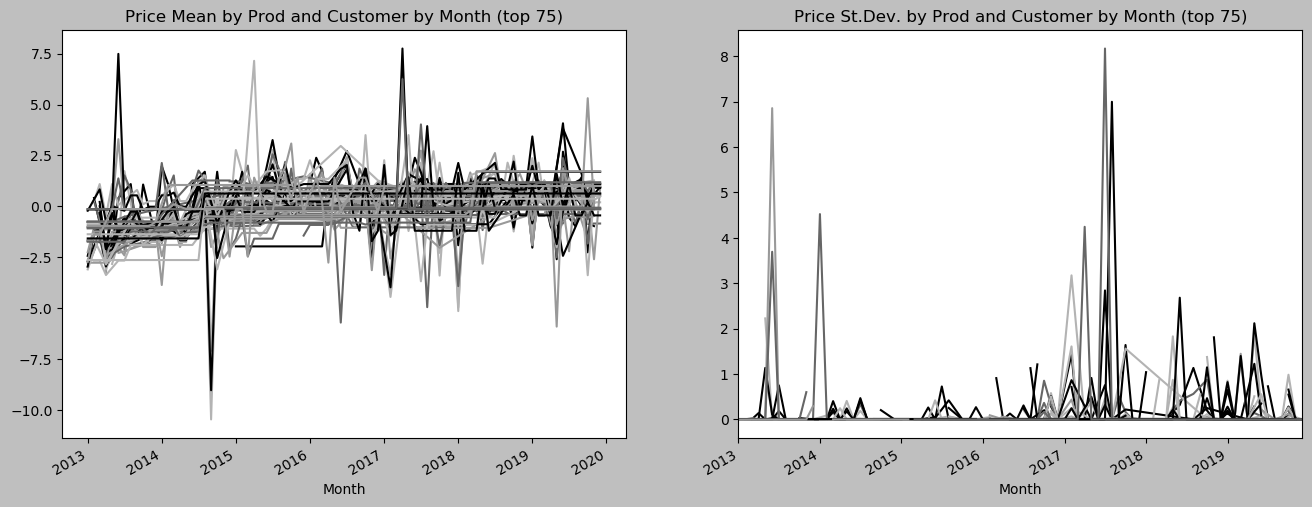

In [15]:
# center and scale price per each product
dataT = data[data['Dollar Sales per 9L Case'] > 0].copy()
dataT['ProductCustomer'] = dataT['Product'] +'-' + dataT['Customer']
dataT['Dollar Sales per 9L Case Norm'] = dataT.groupby('ProductCustomer')['Dollar Sales per 9L Case'].transform(lambda x:(x - x.mean()) / x.std())

topNum=75
bottomProds = (dataT.groupby('ProductCustomer')
            .agg(Tot9LCases= ('9L Cases',sum))
            .sort_values(by='Tot9LCases',ascending=False)
            .head(topNum)
           )

productsMonth=(dataT[dataT['ProductCustomer'].isin(bottomProds.index.values)]
               .groupby(['ProductCustomer','Month'])
               .agg(Price9LMean=('Dollar Sales per 9L Case Norm',np.mean)
                    ,Price9LStd=('Dollar Sales per 9L Case Norm',np.std)
                    ,ProductID=('Product ID','first')
                    ,CustomerID=('Customer ID','first')
                   )               
               .reset_index()
               )

plt.style.use('grayscale')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
productsMonth.groupby('ProductCustomer').plot.line(x='Month',y='Price9LMean',ax=ax1)
ax1.get_legend().remove()
ax1.set_title("Price Mean by Prod and Customer by Month (top " + str(topNum) + ')')

productsMonth.groupby('ProductCustomer').plot.line(x='Month',y='Price9LStd',ax=ax2)
ax2.get_legend().remove()
ax2.set_title("Price St.Dev. by Prod and Customer by Month (top " + str(topNum) + ')')
ax2.set_xlim( productsMonth['Month'].min(),productsMonth['Month'].max())
plt.show()
#print(productsMonth.shape)
productsMonth.sort_values(by='Price9LMean',ascending=False)
plt.style.use('default')

## Counting coustomer and product by Month

46

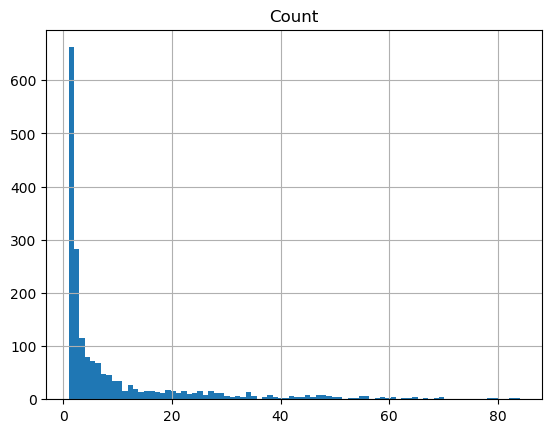

In [16]:
t=data.groupby(['Product','Customer'])['Month'].agg(Count='nunique').sort_values(by='Count',ascending=False)
t.hist(bins=84)
sum(t['Count']>=60)

### Contribution to the revenue

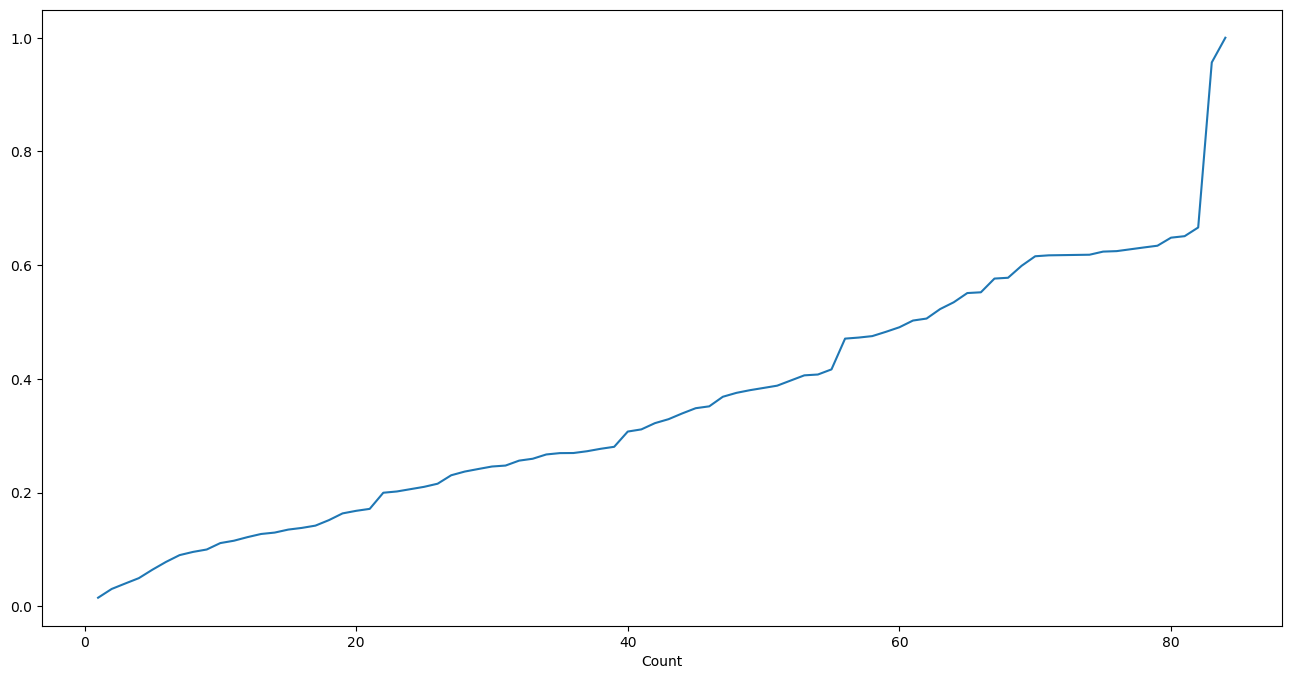

In [17]:
t=(data.groupby(['Product','Customer'])
   .agg(Count=('Month','nunique')
        ,DollarSales = ('Dollar Sales',np.sum)
       )
  )
t['ratioRevenue'] = t['DollarSales'] / sum(t['DollarSales'])
runningSalesByCount=t.groupby('Count')['DollarSales'].sum().cumsum()
runningSalesByCountPerc = runningSalesByCount / sum(t['DollarSales'])
plt.figure(figsize=(16,8))
runningSalesByCountPerc.plot()

#sum(data['Dollar Sales'])
#sum(t[t['Count']>=48]['DollarSales']) / sum(t['DollarSales'])


## Counting Products by Month

37

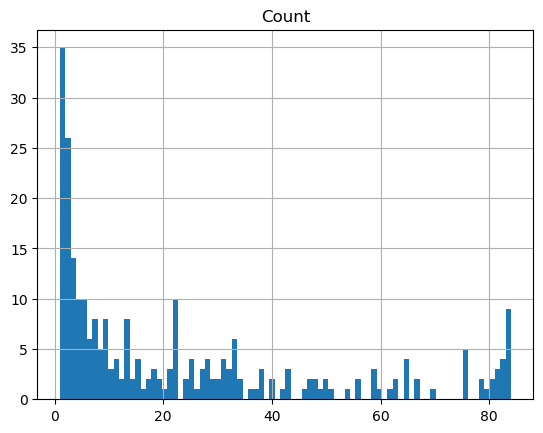

In [18]:
t=data.groupby(['Product'])['Month'].agg(Count='nunique').sort_values(by='Count',ascending=False)
t.hist(bins=84)
sum(t['Count']>=60)

### Contribution to the revenue

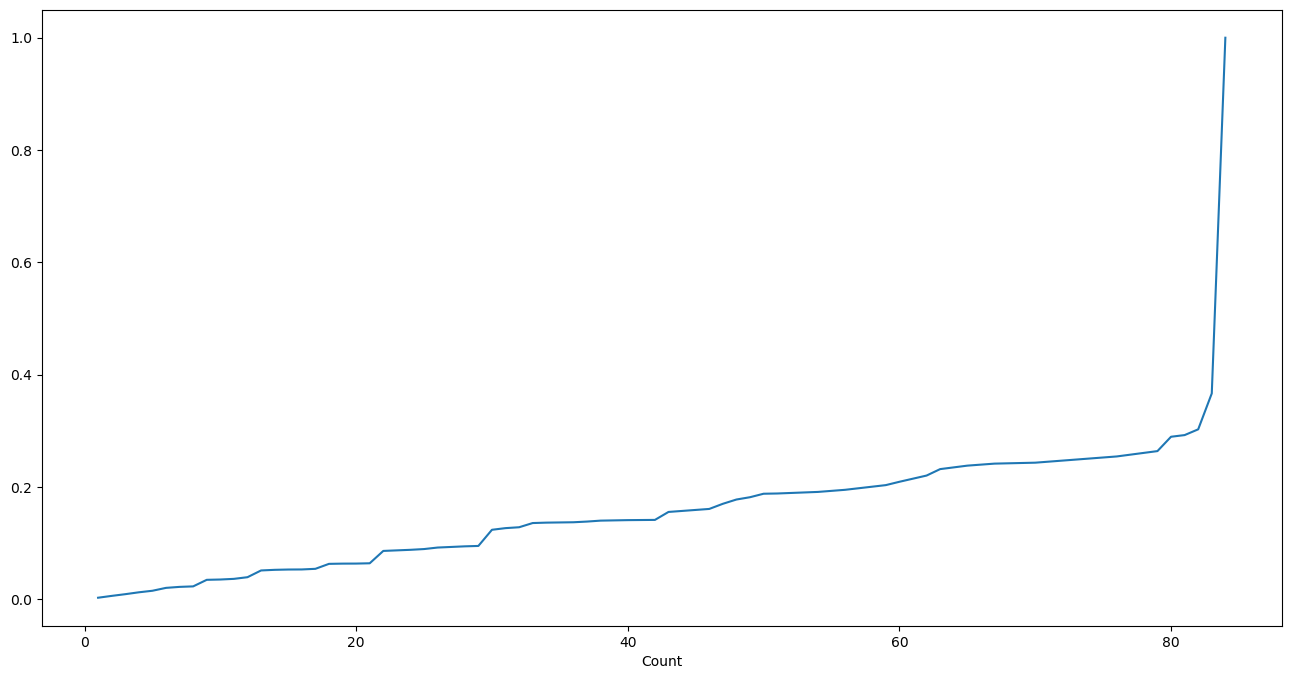

In [19]:
t=(data.groupby(['Product'])
   .agg(Count=('Month','nunique')
        ,DollarSales = ('Dollar Sales',np.sum)
       )
  )
t['ratioRevenue'] = t['DollarSales'] / sum(t['DollarSales'])
runningSalesByCount=t.groupby('Count')['DollarSales'].sum().cumsum()
runningSalesByCountPerc = runningSalesByCount / sum(t['DollarSales'])
plt.figure(figsize=(16,8))
runningSalesByCountPerc.plot()

#sum(data['Dollar Sales'])
#sum(t[t['Count']>=48]['DollarSales']) / sum(t['DollarSales'])


## Price Elasticity

In [20]:
customers = data.groupby(['Customer'])['9L Cases'].agg(sum='sum').sort_values(by='sum',ascending=False)
products = data.groupby(['Product'])['9L Cases'].agg(sum='sum').sort_values(by='sum',ascending=False)
print(customers.head(5))
print(products.head(5))

                                      sum
Customer                                 
COWTOWN DISC LIQUOR SPF LTD     33222.235
WESTERN BEVERAGES               28540.109
WB LIQUORS AND WINE              9616.426
SPEC'S WINES SPIRITS & FINER F   5531.150
COSTCO LIQUORS                   5120.908
                                     sum
Product                                 
JACK DANIELS BLK WHSKY  1L     24181.182
TAAKA VODKA 80  1L             16507.637
JACK DANIELS BLK WHSKY  1.75L  12728.040
JACK DANIELS BLK WHSKY  750M    5709.003
TAAKA VODKA 80 BLUE PET 375M    3003.124


C:\Users\annam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\annam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


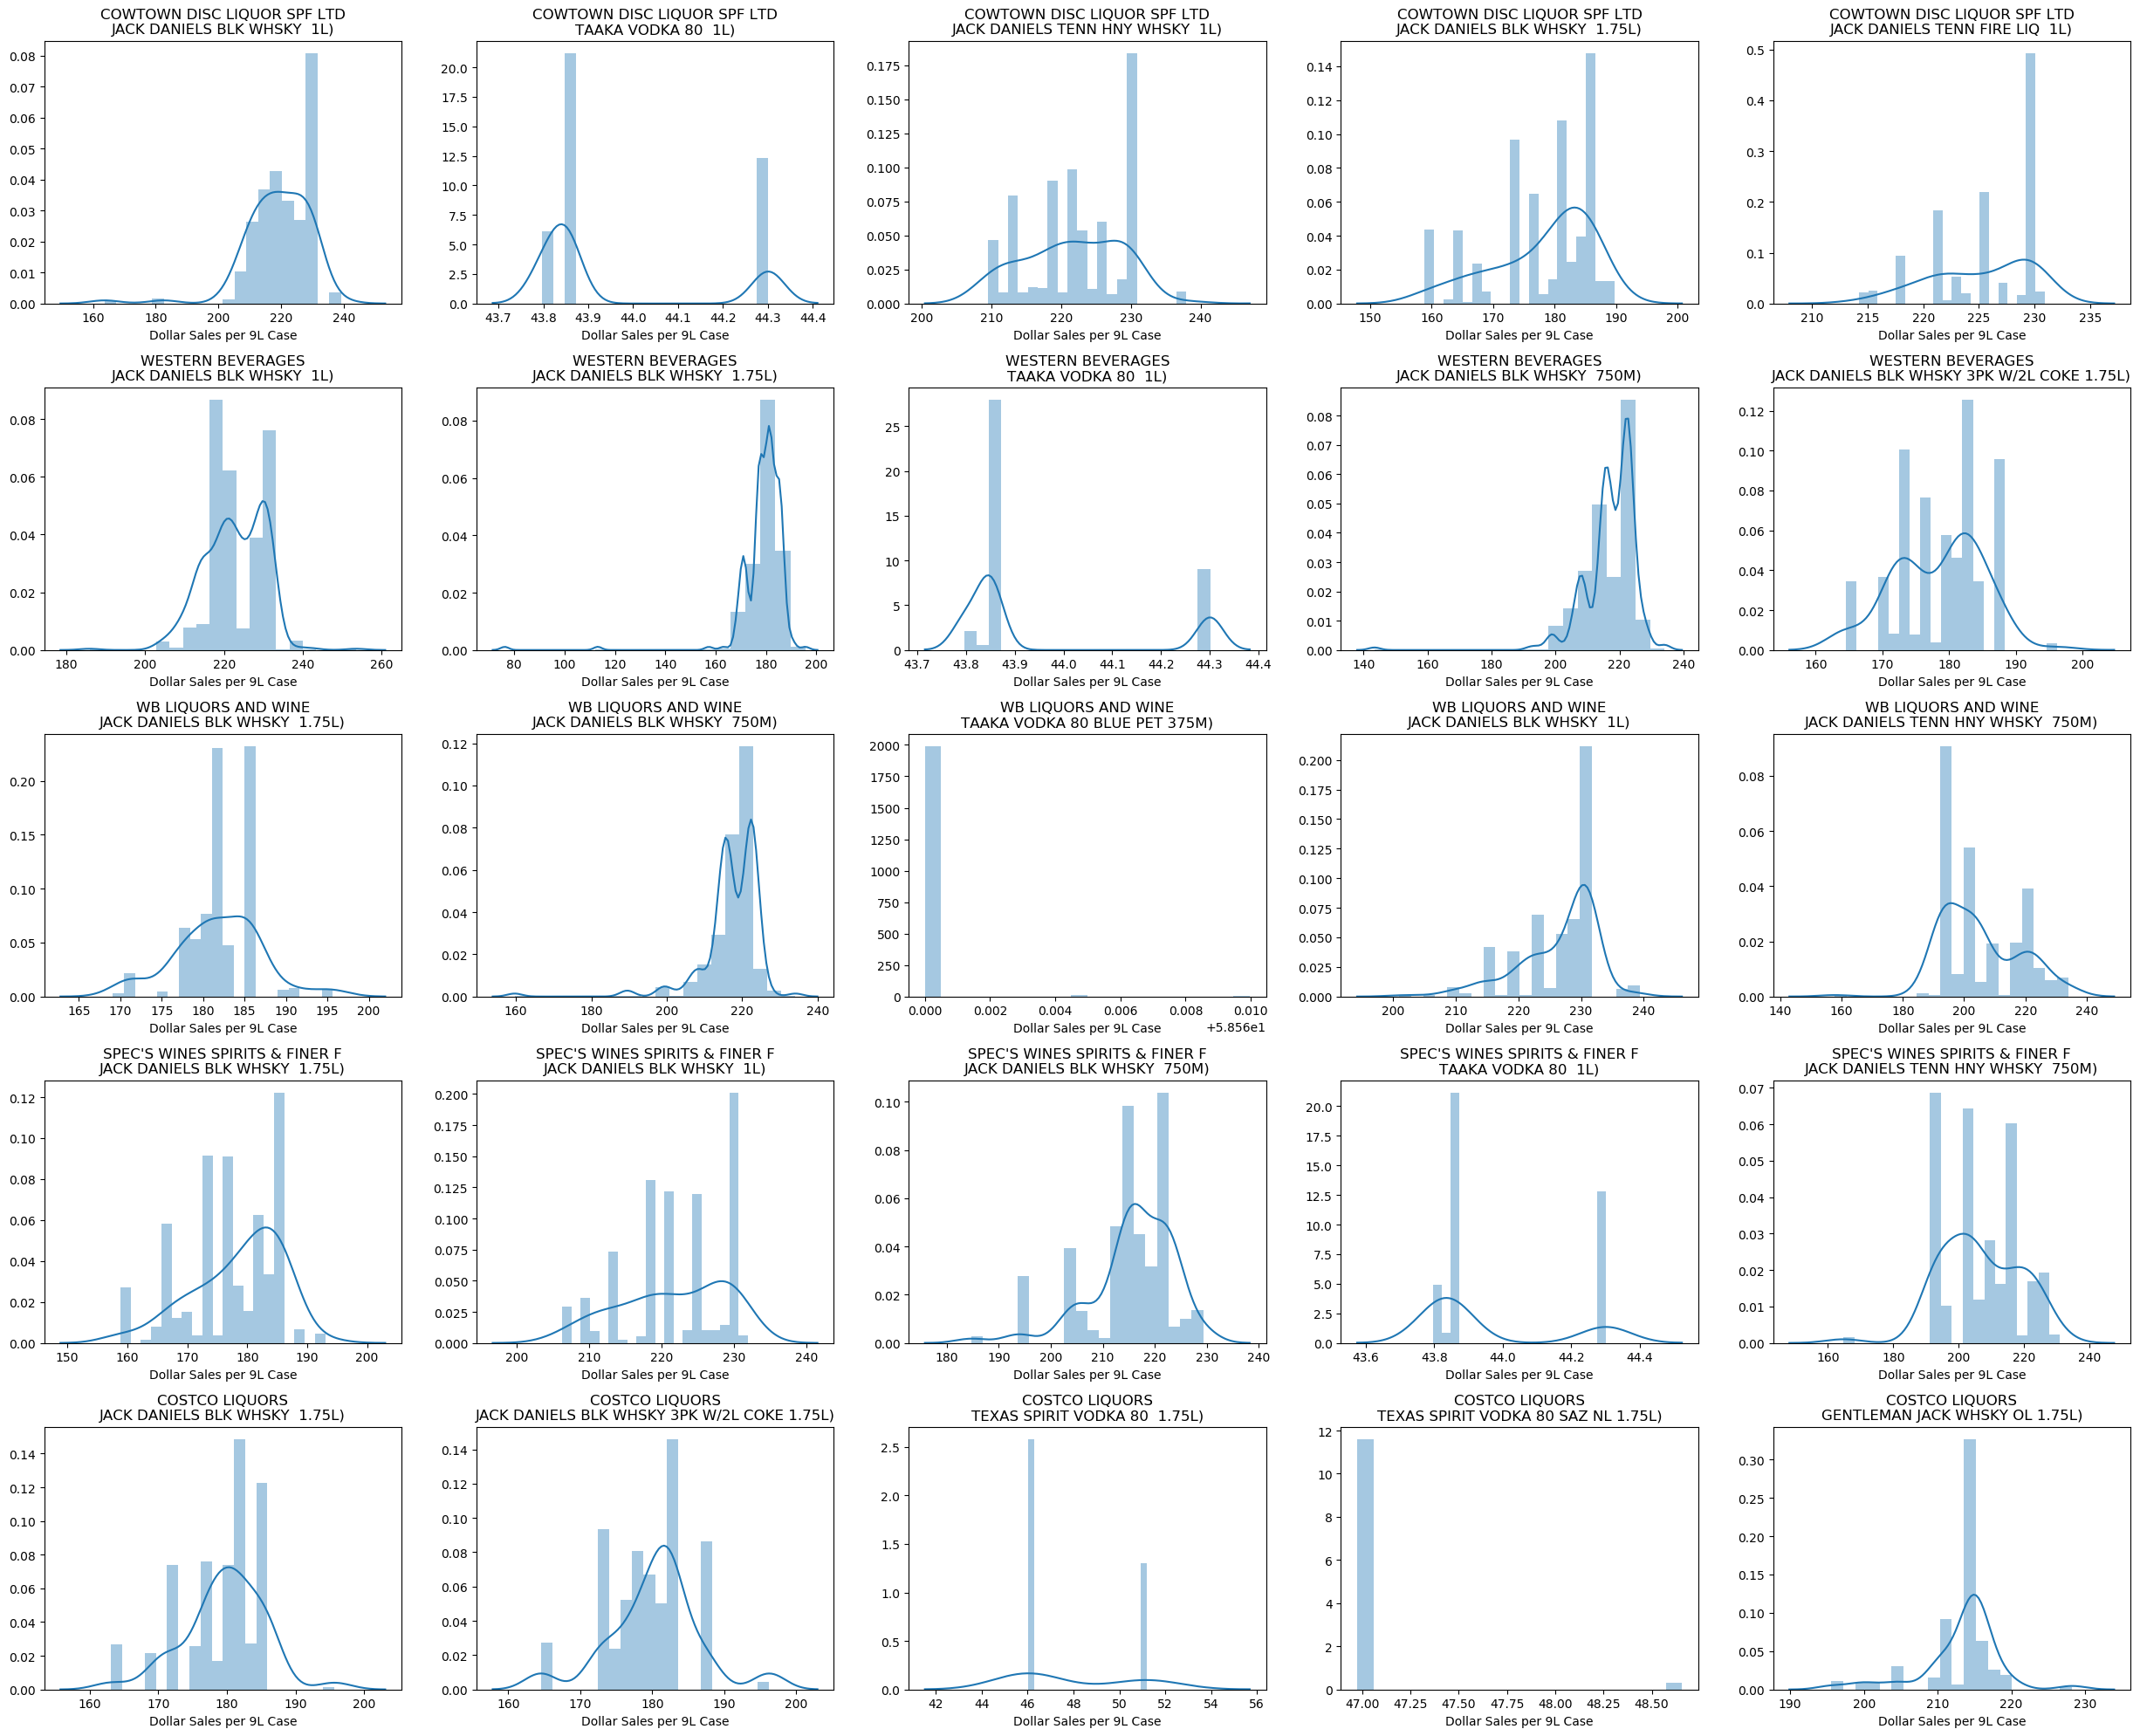

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
cs = 5
ps = 5
cust=customers.index[0:cs]
#prod=products.index[0:ps]
fig, axs = plt.subplots(cs,ps,figsize=(5*cs,ps*4))
for ic,c in enumerate(cust):
    CustProducts = data[data['Customer']==c].groupby(['Product'])['9L Cases'].agg(sum='sum').sort_values(by='sum',ascending=False).index[0:ps]
    for ip,p in enumerate(CustProducts):
        t=data[(data['Customer']==c)  &  (data['Product']==p)]
        sns.distplot(t['Dollar Sales per 9L Case'], hist_kws={'weights':t['Dollar Sales']},bins=20,ax=axs[ic,ip]).set_title(c + "\n" + p+')')
        #sns.distplot(t['Dollar Sales per 9L Case'], hist_kws={'weights':t['9L Cases']},bins=20,ax=axs[ic,ip],color='green',hist=False)
plt.tight_layout()


# Columns selected
MAIN TABLE
---------
Aggregated at Weekly Base

- Date (Year/Week)
- Chain Master
- Customer
- Customer ID
- Product Type
- Brand
- Product
- Product ID
- Label
- Size
- Category (CatMan)
- Type (CatMan)
- General Flavor (CatMan)
- Age Label (CatMan)
- Import or Domestic (CatMan)
- Country (CatMan)
- Region (CatMan)
- Chain
- Category
- Product Type
- Alcohol Proof
- STD. Cases
- Dollar Sales
- 9L Cases
- Dollar Sales per Case
- Dollar Sales per 9L Case

PRICES TABLE
-------------
- List of prices by product (including tiering you have)
- historical by week

FILTERS
-------
- **Time filter** = 2010 - 2019
- **Region** = EL PASO
- **Category (CatMan)** = 'SUP PREM WHISKEY','ECONOMY VODKA'
